# Средняя цена за м^2 между группами

Нулевая гипотеза (H₀): Нет разницы в средней цене за м² между группами.
 
Альтернативная гипотеза (H₁): Средняя цена за м² в группе A выше, чем в группе B.


### Выбираем две группы для сравнения (например, Москва-Сити vs Белорусская)

In [26]:
import pandas as pd
import ast 
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')

if isinstance(df['underground_list'].iloc[0], str):
    df['underground_list'] = df['underground_list'].apply(ast.literal_eval)

df['has_moskva_siti'] = df['underground_list'].apply(lambda x: 'Москва-Сити' in x)
df['has_belorusskaya'] = df['underground_list'].apply(lambda x: 'Белорусская' in x)

group_a = df[df['has_moskva_siti']]['price_per_m2'].dropna()
group_b = df[df['has_belorusskaya']]['price_per_m2'].dropna()

print(f"Объявления рядом с Москва-Сити: n={len(group_a)}, mean={group_a.mean():.0f} руб/м²")
print(f"Объявления рядом с Белорусской: n={len(group_b)}, mean={group_b.mean():.0f} руб/м²")

Объявления рядом с Москва-Сити: n=118, mean=7999 руб/м²
Объявления рядом с Белорусской: n=47, mean=6078 руб/м²


Проверка нормальности

In [6]:
_, p_a = stats.shapiro(group_a.sample(min(5000, len(group_a))))  # ограничиваем выборку для теста
_, p_b = stats.shapiro(group_b.sample(min(5000, len(group_b))))
print(f"\nТест нормальности Шапиро-Уилка:")
print(f"Москва-Сити: p-value={p_a:.3f}")
print(f"Белорусская: p-value={p_b:.3f}")


Тест нормальности Шапиро-Уилка:
Москва-Сити: p-value=0.071
Белорусская: p-value=0.016


Если p-value > 0.05 для обоих групп, используем t-тест, если данные не нормальные - U-тест Манна-Уитни

In [12]:
if p_a > 0.05 and p_b > 0.05:
    # Если данные нормальные, используем t-тест
    t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=(p_levene > 0.05))
    print(f"\nРезультаты t-теста: t={t_stat:.2f}, p-value={p_value:.4f}")
else:
    # Если данные не нормальные, используем U-тест
    u_stat, p_value = stats.mannwhitneyu(group_a, group_b)
    print(f"\nРезультаты U-теста: U={u_stat:.0f}, p-value={p_value:.4f}")


Результаты U-теста: U=3819, p-value=0.0002


### Визуализация

/var/folders/09/t6tn_wqx1ys2v4vlnpydh_4h0000gn/T/ipykernel_33959/178387739.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a, group_b], labels=['Москва-Сити', 'Белорусская'])


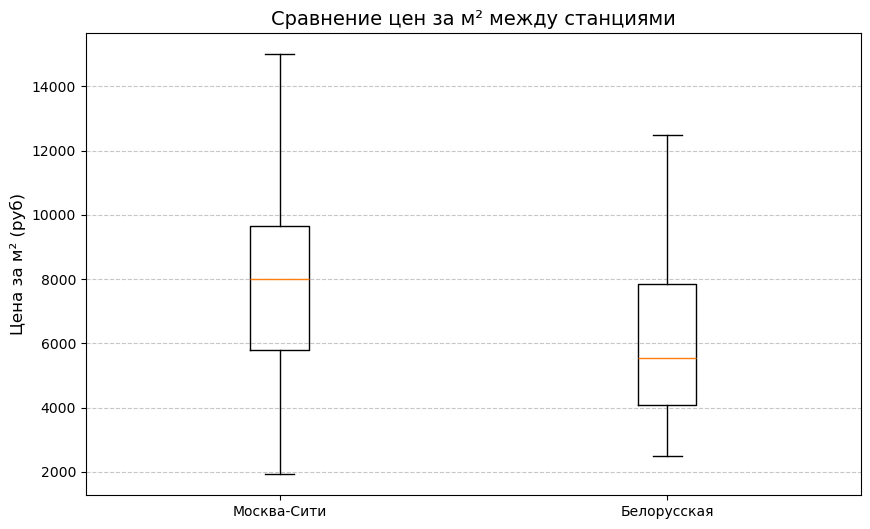

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot([group_a, group_b], labels=['Москва-Сити', 'Белорусская'])
plt.title('Сравнение цен за м² между станциями', fontsize=14)
plt.ylabel('Цена за м² (руб)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

df['has_moskva_siti'] = df['underground_list'].apply(lambda x: 'Москва-Сити' in x)
df['has_belorusskaya'] = df['underground_list'].apply(lambda x: 'Белорусская' in x)


group_a = df[df['has_moskva_siti']]['price_per_m2'].dropna()
group_b = df[df['has_belorusskaya']]['price_per_m2'].dropna()


median_a = np.median(group_a)
median_b = np.median(group_b)
mean_a = group_a.mean()
mean_b = group_b.mean()


In [ ]:

median_a = np.median(group_a)
median_b = np.median(group_b)

# Выполняем U-тест
u_stat, p_value = stats.mannwhitneyu(group_a, group_b)


n1 = len(group_a)
n2 = len(group_b)



r_alt = 1 - (2 * u_stat) / (n1 * n2)

print(f"""
Результаты сравнения цен за м²:
1. Медианы:
   - Москва-Сити: {median_a:.0f} руб
   - Белорусская: {median_b:.0f} руб
2. U-тест Манна-Уитни:
   - U = {u_stat}
   - p-value = {p_value:.4f}
3. Размер эффекта:
   - r (u тест) = {r_alt:.3f}
4. Интерпретация:
   - {'Различие значимо' if p_value < 0.05 else 'Нет значимых различий'}
   - Размер эффекта: {'большой' if abs(r) >= 0.5 else 'средний' if abs(r) >= 0.3 else 'малый'}
""")


Результаты сравнения цен за м²:
1. Медианы:
   - Москва-Сити: 8000 руб
   - Белорусская: 5556 руб
2. U-тест Манна-Уитни:
   - U = 3819.0
   - p-value = 0.0002
3. Размер эффекта:
   - r (u тест) = -0.377
4. Интерпретация:
   - Различие значимо
   - Размер эффекта: большой



## На основании U-теста Манна-Уитни (U=3819, p=0.0002) мы отвергаем нулевую гипотезу. Цены за м² у станции 'Москва-Сити' значимо выше, чем у 'Белорусской'


"Существует статистически значимое (p<0.001) и практически важное (r=0.38) различие в ценах на недвижимость между станциями. Квартиры у "Москва-Сити" в среднем на 44% дороже, что делает "Белорусскую" более привлекательной для бюджетных покупателей, тогда как "Москва-Сити" представляет премиальный сегмент рынка."

